# Imported Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import iqr
import plotly.express as px

In [ ]:
print('hello world')

# Importing the Data

In [2]:
pen_global = pd.read_csv('/Users/raph/Desktop/pen_global.csv')
pen_global.head(10)
# pen_global.info()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Target
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,'Normal'
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,'Anomaly'
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,'Anomaly'
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,'Anomaly'
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,'Anomaly'
5,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,'Anomaly'
6,0,100,3,72,26,35,85,35,100,71,73,97,65,49,66,0,'Anomaly'
7,0,39,2,62,11,5,63,0,100,43,89,99,36,100,0,57,'Anomaly'
8,13,89,12,50,72,38,56,0,4,17,0,61,32,94,100,100,'Anomaly'
9,57,100,22,72,0,31,25,0,75,13,100,50,75,87,26,85,'Anomaly'


# Normalization of the Data

In [3]:
def normalization(df, method, m_num = None):
    #--------------------------------------------------#
    def asym_bi(df):
        outputs = df.unique()
        df = df.to_frame()
        df.loc[df[df.columns[0]] == outputs[0]] = 1
        df.loc[df[df.columns[0]] == outputs[1]] = -1
        return df
    #--------------------------------------------------#       
    def rename_col(df):
        names = []
        col = df.shape[1]
        for i in range(0,col):
            if i < col-1:
                j = str(i)
                names.append('x'+ j)
            else:
                names.append('y')
        df = df.set_axis(names, axis = 1)
        return df
    #--------------------------------------------------#

    col = df.shape[1]
    for i in range(0, col):
        if df.dtypes[i] == int or df.dtypes[i] == float:
            if method == 'max norm':
                df.iloc[:,i] = df.iloc[:,i]/m_num
            else:
                max_num = max(df.iloc[:,i])
                min_num = min(df.iloc[:,i])
                df.iloc[:,i] = (df.iloc[:,i] - min_num)/(max_num-min_num)
        elif df.dtypes[i] == object:
            df_s = df.iloc[:,i]
            df_s = asym_bi(df_s)
    n_df = df.iloc[:,0:df.shape[1] -1].merge(df_s, left_index = True, right_index = True)
    n_df = rename_col(n_df)
    return n_df

In [4]:
n_df = normalization(pen_global, 'min_max', 100)
n_df.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,0.47,1.00,0.27,0.81,0.57,0.37,0.26,0.00,0.00,0.267442,0.56,0.53,1.00,0.90,0.40,0.98,1
1,0.00,0.89,0.27,1.00,0.42,0.75,0.29,0.45,0.15,0.174419,0.37,0.00,0.69,0.02,1.00,0.06,-1
2,0.00,0.57,0.31,0.68,0.72,0.90,1.00,1.00,0.76,0.872093,0.50,0.51,0.28,0.25,0.16,0.00,-1
3,0.00,1.00,0.07,0.92,0.05,0.68,0.19,0.45,0.86,0.395349,1.00,0.45,0.74,0.23,0.67,0.00,-1
4,0.00,0.67,0.49,0.83,1.00,1.00,0.81,0.80,0.60,0.697674,0.40,0.40,0.33,0.20,0.47,0.00,-1


# Separating the Normal data from the Anomalies


In [5]:
norm_df = n_df[n_df.y == 1]
# print(norm_df.head(5))
anom_df = n_df[n_df.y == -1]
# print(anom_df.head(5))


In [6]:
adj_norm_df = norm_df.drop(['y'], axis = 1)
dim_norm = adj_norm_df.shape
arr_norm= np.array(adj_norm_df)


adj_anom_df = anom_df.drop(['y'], axis = 1)
arr_anom= np.array(adj_anom_df)
dim_anom = adj_anom_df.shape

In [7]:
all_norm = pd.DataFrame(np.reshape(arr_norm, dim_norm[0]*dim_norm[1]), columns = ['x'])
all_anom = pd.DataFrame(np.reshape(arr_anom, dim_anom[0]*dim_anom[1]), columns = ['x'])

# Freedman-Diaconis Rule

In [8]:
def bin_range(df):
    vals = df.values
    bin_width = 2 * (iqr(vals) / (len(vals) ** (1./3)))
    num_bins = int((np.amax(vals) + bin_width) / bin_width)
    return bin_width, num_bins 

def histo_viz(df, n):
    for n in range(0,n):
        vals = df.values
        bin_width, num_bins = bin_range(df)
        hist = df.hist(bins=num_bins)
    return hist

# Histogram Visualizations

0.05139 20
0.10981 10


Text(0.5, 1.0, 'Anomalous Entries')

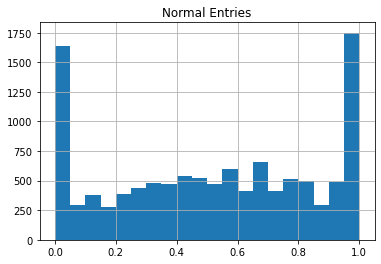

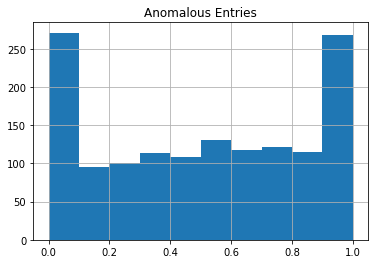

In [10]:
bin_width_norm, num_bins_norm = bin_range(all_norm)
bin_width_anom, num_bins_anom = bin_range(all_anom)
print(round(bin_width_norm, 5), num_bins_norm)
print(round(bin_width_anom, 5), num_bins_anom)


histo_viz(all_norm, 1)
plt.title('Normal Entries')
histo_viz(all_anom, 1)
plt.title('Anomalous Entries')

# Overlapping Histograms
## Normal Entries and Anoumalous Entries

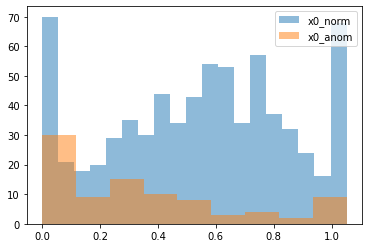

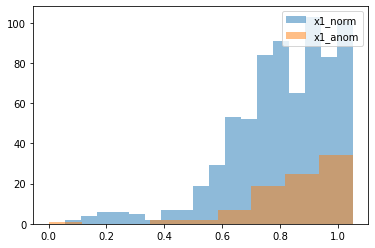

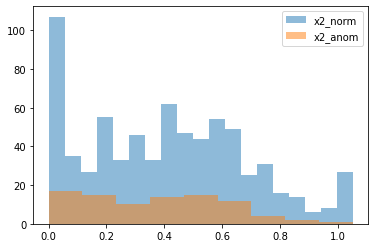

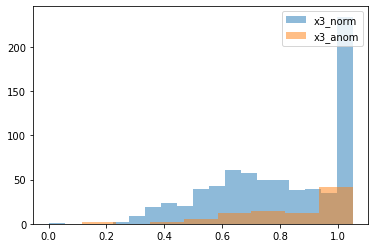

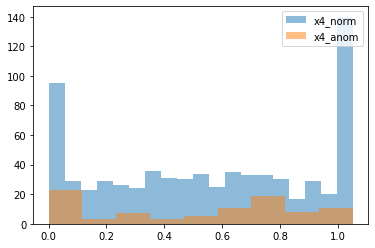

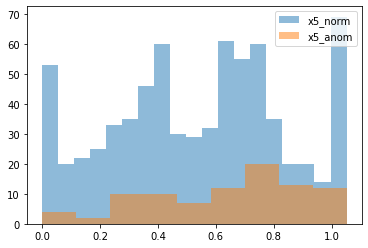

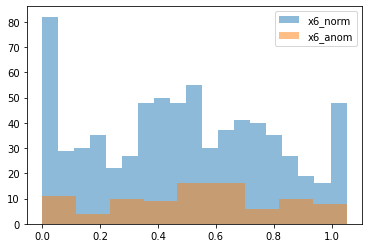

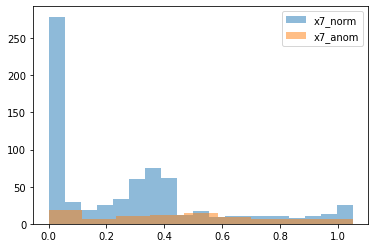

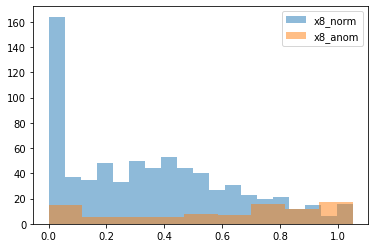

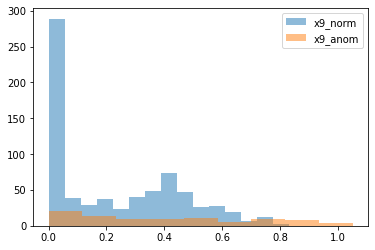

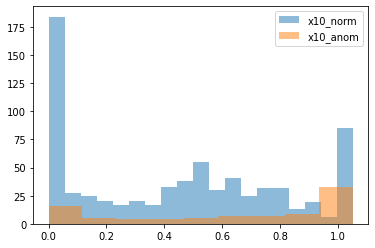

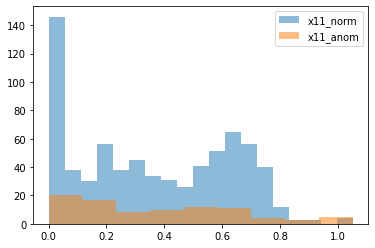

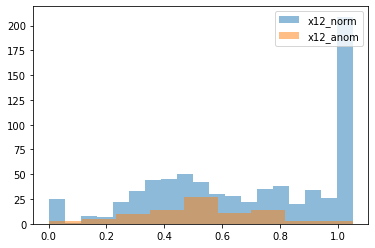

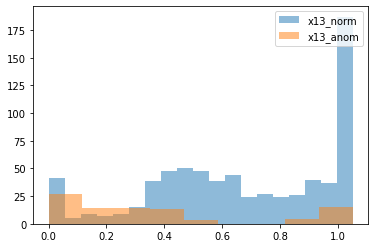

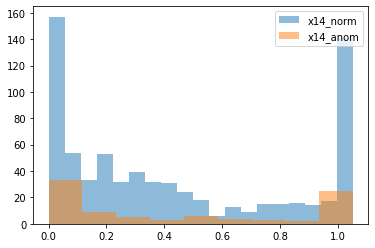

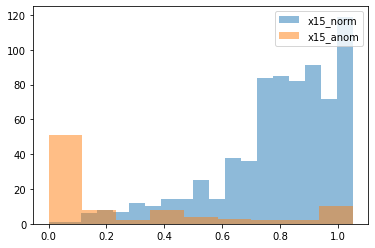

In [12]:
bins_norm = np.linspace(0, np.amax(arr_norm) + bin_width_norm, num_bins_norm)
bins_anom = np.linspace(0, np.amax(arr_anom) + bin_width_norm, num_bins_anom)

names = adj_norm_df.columns
for i in range(0, adj_norm_df.shape[1]):
    plt.hist(adj_norm_df.iloc[:,i].values, bins_norm, alpha=0.5, label=names[i]+'_norm')
    plt.hist(adj_anom_df.iloc[:,i].values, bins_anom, alpha=0.5, label=names[i]+'_anom')    
    plt.legend(loc='upper right')
    plt.show()

# Visualize the Dataset Using Parallel Coordinates

<AxesSubplot:>

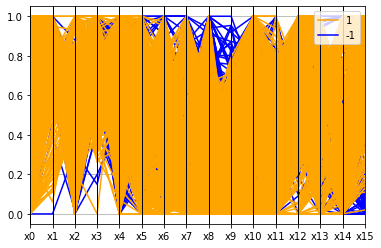

In [18]:
pd.plotting.parallel_coordinates(n_df, 'y', color=('#FFA500', '#0000FF'))

# Visulaize the Dataset Using Pearson Correlation

In [155]:
temp = n_df.drop(['y'], axis=1)
corr = temp.corr()
# corr.head(5)
# dataframe['Percentage'] > 70
fil_df = corr[((corr > 0.5) & (corr != 1))] #| ((corr < -0.5) & (corr != 1))]
print(fil_df.count())
print(sum(fil_df.count()))
fil_df

x0     0
x1     0
x2     0
x3     2
x4     0
x5     2
x6     0
x7     1
x8     0
x9     1
x10    2
x11    3
x12    2
x13    3
x14    1
x15    1
dtype: int64
18


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
x0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3,NaN,NaN,NaN,NaN,NaN,0.611720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.550371,NaN
x4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x5,NaN,NaN,NaN,0.611720,NaN,NaN,NaN,0.792356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x7,NaN,NaN,NaN,NaN,NaN,0.792356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.524591,NaN,NaN,NaN,NaN,NaN


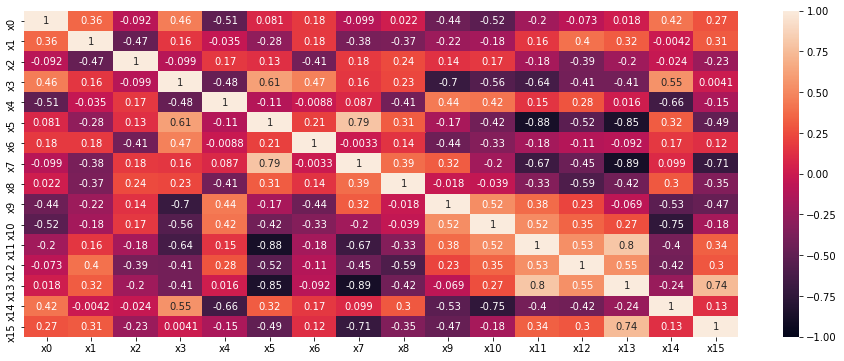

In [137]:
# plt.figure(figsize=(16, 6))

# heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

# Analysis
### What can you say about the distributions of the data attributes?
- The values seem to be randomly distributed as seen from the Parallel Coordinates visualization with some exception on the attributes, $x7, x8, x9, x14$, and $x15$. Moving on the to the Pearson Correlation, we choose to use the interval [-0.2, 0.2], $A$, as a basis for weak to no correlation between the variables. As seen from coutning the entries that are not elements of $A$, there exist 150 combinations that have a significant correlation between the randomly chosen variables. However, adjusting the value for correlation to exist to $\rho$ > |0.5|, then the number of combinations between the variables drop a bit more than 66% to a total of 48 combinations that have a significant correaltions. Showing only positively correlated values, the number than drops to 18 using 0.5 as the threshold.

### Is the data linearly seperable?
- The data is possibly linearly seperable as there can exist some hyperplane that can show a division between the Normal entries and Anomalous entries using the relevant attributes $x11, x12, x13$ obtained from the Pearson coefficent heatmap.

### If you were to come up with a new set of data attributes, which attributes would you include and why?
- **Central Tendencies**
    - *Average*, *Median* The average between all the varaibles would add another dimension to see whether the averages follow some sort of value. The median on the other hand will be able to act as a solution for possible outliers in the data. The average and the median will be taken per row.

- **Variance** This is see whether there is some sort of variability when moving from 1 attribute to another. This will be done by taking the variance of each row. 

- **Residuals** This can be done as a way or normalizing the data. The average per variable can be taken then the reisduals would be the entry subtracted by the average.

- It may also be possible to apply **Principal Component Analysis** with will apply Dimensional Reduction by only including varaibles that show great impact to the 'Target'. As increasing the number of dimensions may cause the 'Curse of Dimensionality'.

# Scatterplot Visualization

In [154]:
# rel_df = n_df[['x11','x12','x13','y']]
# fig = px.scatter_3d(rel_df, x='x11', y='x12', z='x13',
#                     color='y')
# fig.show()